# Descriptive Analysis and Statistics of the whole Cluster dataset:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import get_data
import os 
os.getcwd()

'C:\\Users\\narma\\Desktop\\302C GitHub\\covid19-public'

In [2]:
# To read the original Covid dataset from the GitHub
dataset = get_data.read_csv('epidemic','clusters') 
df_1 = get_data.convert_state_code(dataset) #------States column converted from integer to string
df_1

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en
0,KLUSTER WARGA JEPUN,W.P. KUALA LUMPUR,LEMBAH PANTAI,2020-03-01,2020-03-09,import,ended,0,3,0,267,0,0,3,NaN,NaN
1,KLUSTER UDA,"JOHOR,NEGERI SEMBILAN,SELANGOR,W.P. KUALA LUMP...",PELBAGAI,2020-03-04,2020-03-01,import,ended,0,144,0,1864,0,2,142,NaN,NaN
2,KLUSTER KEAGAMAAN (TABLIGH SRI PETALING),not stated,PELBAGAI,2020-03-13,2020-03-11,religious,ended,0,2022,0,42023,0,34,1988,NaN,NaN
3,KLUSTER TABLIGH NEW DELHI,"NEGERI SEMBILAN,SELANGOR,W.P. KUALA LUMPUR,W.P...",PELBAGAI,2020-03-16,2020-03-20,import,ended,0,24,0,57,0,0,24,NaN,NaN
4,KLUSTER AIROD,PAHANG,KUANTAN,2020-03-31,2020-03-31,workplace,ended,0,65,0,734,0,0,65,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7151,KLUSTER DUA JALAN PADANG GOLF 3,SELANGOR,HULU SELANGOR,2022-11-26,2022-11-25,highRisk,active,0,25,25,35,0,0,0,Kluster ini merupakan kluster berulang untuk k...,This is a third recurring cluster involving re...
7152,KLUSTER JALAN PADANG GOLF 5,SELANGOR,HULU SELANGOR,2022-11-27,2022-11-26,highRisk,active,0,3,3,13,0,0,0,Kluster ini merupakan kluster berulang kali ke...,This cluster is the fifth repeated cluster inv...
7153,KLUSTER DAH BATU 19,KEDAH,KUBANG PASU,2022-11-27,2022-12-04,education,active,12,84,84,214,0,0,0,Kluster ini melibatkan pelajar-pelajar sebuah ...,This cluster involves students from an educati...
7154,KLUSTER DAH TERABAK,KEDAH,KUBANG PASU,2022-12-01,2022-12-04,education,active,2,89,89,702,0,0,0,Kluster ini melibatkan pelajar-pelajar sebuah ...,This cluster involves the students of an educa...


In [3]:
#To view the 8 statistical properties of each attribute
df_1.describe()

,cases_new,cases_total,cases_active,tests,icu,deaths,recovered
count,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000,7156.000000
mean,0.001956,78.429290,0.355226,318.667552,0.001677,0.272359,77.770542
std,0.143809,199.387438,5.303520,1086.949175,0.040919,1.288240,199.073056
min,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,51.000000,0.000000,0.000000,18.000000
50%,0.000000,35.000000,0.000000,117.000000,0.000000,0.000000,35.000000
75%,0.000000,73.000000,0.000000,282.250000,0.000000,0.000000,73.000000
max,12.000000,7205.000000,197.000000,42100.000000,1.000000,37.000000,7204.000000


To view the class distribution for the 'status' column and 'category' column

In [4]:
df_1.groupby('status').size() #----To view the number of active and ended cases

status
active      57
ended     7099
dtype: int64

In [5]:
df_1.groupby('category').size() #----To view the number of categories

category
community          1732
detentionCentre     162
education           975
highRisk            486
import               53
religious           181
workplace          3567
dtype: int64

# Analysing the Death distribution according to each category

In [6]:
df_1['deaths'].sum() #-----To calculate the total number of deaths in the original dataset

1949

In [7]:
# To determine the cluster with maximum number of deaths
maxValues = df_1[['deaths']].max()
maxValues
maxDeaths = df_1.loc[df_1['deaths'] == int(maxValues)]
maxDeaths

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en
2382,KLUSTER RANTAU KENANGA,"PAHANG,PERAK","MARAN, BERA, TEMERLOH, JERANTUT, KUANTAN, BENT...",2021-06-08,2021-07-27,community,ended,0,568,0,4772,0,37,531,NaN,NaN


To check number of active cases and total number of deaths recorded in the active cases

In [8]:
df_active = (df_1.loc[df_1['status'] == 'active']) #------To view the active clusters in the dataset
df_active

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en
7088,KLUSTER JALAN REJANG,W.P. KUALA LUMPUR,TITIWANGSA,2022-10-27,2022-11-07,education,active,0,44,44,59,0,0,0,Kluster ini melibatkan pelajar-pelajar asrama ...,This cluster involves students from an educati...
7092,KLUSTER MAYANG PASIR 2,PULAU PINANG,"BARAT DAYA, TIMUR LAUT, SEBERANG PERAI UTARA",2022-10-31,2022-11-22,workplace,active,0,110,110,1385,0,0,0,Kluster ini merupakan kluster berulang untuk k...,This cluster is the second recurring cluster i...
7098,KLUSTER CHANGKAT BERANGAN,PERAK,"HULU PERAK, KUALA KANGSAR",2022-11-03,2022-11-10,education,active,0,144,144,154,0,0,0,Kluster ini melibatkan pelajar-pelajar sebuah ...,This cluster involves the students of an educa...
7100,KLUSTER KM132 AYER PA’ABAS 2,MELAKA,"ALOR GAJAH, MELAKA TENGAH",2022-11-04,2022-11-16,education,active,0,204,197,300,0,0,7,Kluster ini melibatkan pelajar-pelajar sebuah ...,This cluster involves students from an educati...
7101,KLUSTER JALAN SEREMBAN TIGA 2,NEGERI SEMBILAN,SEREMBAN,2022-11-04,2022-11-16,education,active,0,84,84,276,0,0,0,Kluster ini merupakan kluster berulang kali ke...,This cluster is the second repeated cluster id...
7102,KLUSTER JALAN KAMPUNG PILIN,NEGERI SEMBILAN,REMBAU,2022-11-04,2022-11-17,education,active,0,108,108,166,0,0,0,Kluster ini merupakan saringan bergejala yang ...,This cluster is identified as a result of symp...
7105,KLUSTER JALAN SHAH BANTING 3,SELANGOR,KUALA LANGAT,2022-11-06,2022-11-23,education,active,0,125,125,125,0,0,0,Kluster ini merupakan kluster berulang kali ke...,This cluster is the third repeated cluster of ...
7106,KLUSTER INDUSTRI RAWANG BESTARI 3,SELANGOR,"GOMBAK, HULU SELANGOR",2022-11-08,2022-11-07,workplace,active,0,10,10,10,0,0,0,Kluster ini merupakan kluster berulang kali ke...,This cluster is the third recurring cluster in...
7107,KLUSTER JALAN BUKIT IDAMAN,SELANGOR,"GOMBAK, HULU SELANGOR",2022-11-08,2022-11-07,workplace,active,0,6,6,6,0,0,0,Kluster ini melibatkan kakitangan-kakitangan s...,This cluster involves the staffs of a public a...
7108,KLUSTER JALAN SAYUR,W.P. KUALA LUMPUR,CHERAS,2022-11-08,2022-11-07,education,active,0,7,7,7,0,0,0,Kluster ini melibatkan pelajar-pelajar dan kak...,This cluster involves students and staff from ...


In [9]:
# To check whether there were any deaths in the active cases
active_deaths = df_active['deaths'].sum() 
active_deaths = df_active.loc[df_active['deaths'] == int(active_deaths)] 
active_deaths

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered,summary_bm,summary_en
7134,KLUSTER LORONG KAPAL 3,PULAU PINANG,SEBERANG PERAI UTARA,2022-11-13,2022-11-12,highRisk,active,0,23,22,28,0,1,0,Kluster ini merupakan kluster berulang kali ke...,This cluster is the third recurring cluster in...


In [10]:
# To view the number of deaths according to Category in a pivot table
pivot = df_1.pivot_table(index = 'category', values ='deaths', aggfunc = sum)
pivot
pivot = pivot.sort_values('deaths') #----To sort the values in ascending order
pivot

,deaths
category,
import,15
education,23
detentionCentre,53
religious,161
highRisk,446
workplace,554
community,697


<AxesSubplot:xlabel='Category', ylabel='Deaths'>

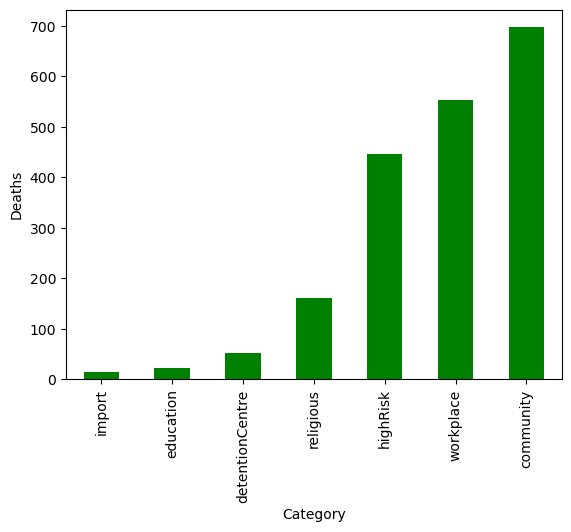

In [11]:
# To plot a bar chart to visualise death distribution according to categories
pivot.plot(kind = 'bar', xlabel = 'Category', ylabel = 'Deaths', color = 'green', legend = False)

<AxesSubplot:>

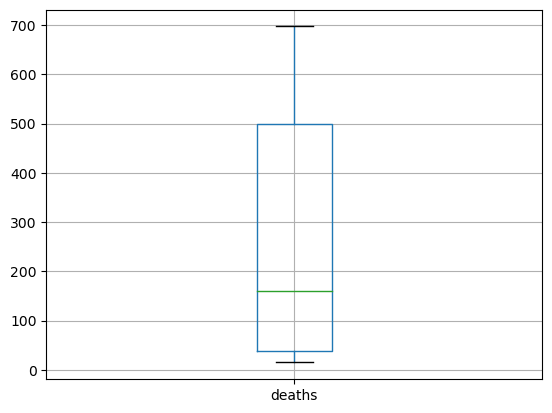

In [12]:
pivot.boxplot()

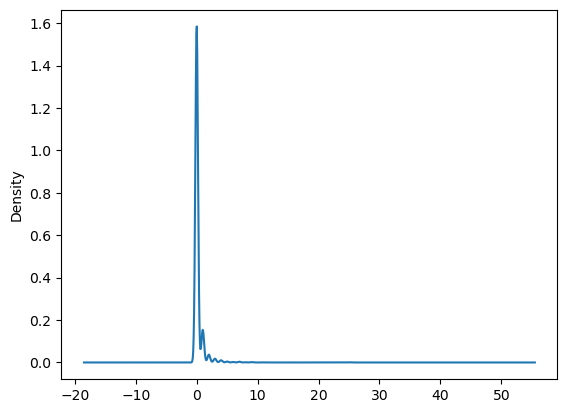

In [13]:
df_1['deaths'].plot(kind = 'density')
plt.show()

<AxesSubplot:ylabel='Density'>

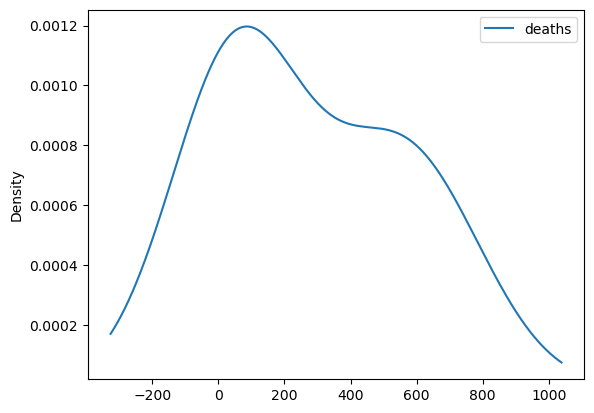

In [14]:
pivot.plot(kind = 'density')

In [15]:
df_1.skew(numeric_only = True)

cases_new       81.561762
cases_total     14.940816
cases_active    20.779530
tests           22.116428
icu             24.363576
deaths          13.469227
recovered       14.975666
dtype: float64